# Practicum Convolution Neural Nets (CNN)

## Imports

In [6]:
# Voeg imports toe als je ze nodig hebt
import torch
import torchvision.io as tio
import matplotlib.pyplot as plt

%matplotlib inline 

## Bronnen

EuroSAT project: https://github.com/phelber/eurosat

Pytorch Neural Nets: https://pytorch.org/docs/stable/nn.html

Kernels: https://en.wikipedia.org/wiki/Kernel_(image_processing)

A simple CNN with Pytorch: https://tomroth.com.au/pytorch-cnn

A guide to convolution arithmetic for deep learning: https://arxiv.org/pdf/1603.07285.pdf

Using Dropout Regularization in PyTorch Models: https://machinelearningmastery.com/using-dropout-regularization-in-pytorch-models

if neurons are randomly dropped out of the network during training, other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the network becomes less sensitive to the specific weights of neurons. This, in turn, results in a network capable of better generalization and less likely to overfit the training data.

## Context

Dit practicum bestaat uit twee onderdelen: het toepassen van een convolutie en pooling filter, en het bouwen en trainen van een eenvoudig convolutional neural net dat een industrieterrein van een bos kan onderscheiden. Voor beide oefeningen gebruiken we de EuroSAT_RGB dataset.

## Voorbereiding

1.  Download de EuroSAT_RGB dataset.

Zie https://zenodo.org/record/7711810#.ZAm3k-zMKEA voor de beschrijving.


2. Unzip de EuroSAT_RGB.zip in de folder van dit notebook (. path) en bekijk de inhoud.

## Opdrachten

### Opdracht 1: afbeelding inladen

PyTorch Vision maakt het inladen van afbeeldingen gemakkelijk via:

https://pytorch.org/vision/stable/io.html

In [ ]:
# a. Localiseer de afbeelding 'Industrial_1.jpg'

## \data\EuroSat\Industrial\Industrial_1.jpg

# b. Wat is het relative pad van 'Industrial_1.jpg'?

## \data\EuroSat\Industrial\

# c. Bekijk de documentatie van de PyTorch io module

## https://pytorch.org/vision/stable/io.html
## read_image(path[, mode])
## Reads a JPEG or PNG image into a 3 dimensional RGB or grayscale Tensor.

# d. Laad de afbeelding 'Industrial_1.jpg' in (variable 'industrial')

In [7]:
path_data = './data/EuroSat/Industrial/'
path_data_forest = './data/EuroSat/Forest/'
industrial = tio.read_image(path_data + 'industrial_1.jpg')
type(industrial)

torch.Tensor

In [8]:
industrial.shape

torch.Size([3, 64, 64])

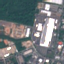

In [9]:
# plt.imshow(industrial, interpolation='nearest')
# plt.show
# doesnt work cuz 3,64,64 not 64,64,3
import torchvision.transforms.functional as F
img = F.to_pil_image(industrial)

display(img) # img.show() opens up a window instead of inline

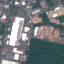

In [10]:
from PIL import Image
# out = im.resize((128, 128))
# out = im.rotate(45) # degrees counter-clockwise
# out = im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
# out = im.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
# out = im.transpose(Image.Transpose.ROTATE_90)
# out = im.transpose(Image.Transpose.ROTATE_180)
# out = im.transpose(Image.Transpose.ROTATE_270)

display(img.transpose(Image.Transpose.ROTATE_180))

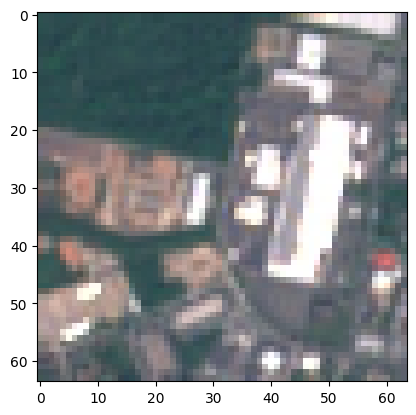

In [11]:
#use permute 
plt.imshow(industrial.permute(1,2,0))

### Opdracht 2: convolutie + padding uitvoeren

De basis-ingrediënten van een CNN, convolutie en pooling, hebben we al met de hand uitgevoerd.

Ditmaal voeren we een convolutie filter uit met PyTorch Functional:

https://pytorch.org/docs/stable/nn.functional.html

In [ ]:
# a. Bekijk het voorbeeld helemaal onderaan de documentatie over conv2d
        # With square kernels and equal stride
        # filters = torch.randn(8, 4, 3, 3)
        # inputs = torch.randn(1, 4, 5, 5)
        # F.conv2d(inputs, filters, padding=1)

In [12]:
# b. Welke dimensie heeft de tensor 'industrial'?
industrial.shape

torch.Size([3, 64, 64])

In [13]:
industrial[0][:].shape

torch.Size([64, 64])

In [14]:
# c. Maak een 3 x 3 kernel om een edge te detecteren:

    #    - Voor kernels zie bronnen
    #    - Representeer de kernel als een tensor met naam 'edge_filter'

edge_filter = torch.Tensor([
            [ 1,  1,  1], 
            [ 0,  0, 0 ], 
            [-1, -1, -1]
])
edge_filter
type(edge_filter)

torch.Tensor

In [16]:

# d. Ontwerp een conv2d filter:

#    - Geef 'edge_filter' mee
#    - De default stride is 1 (geeft aan hoeveel de kernel verplaatst per stap)
#    - De default padding is 0 (geeft aan hoe we omgaan met de randen)


## option to use scipy convolve2d or the numpy only method deviced in the previous assignment
import numpy as np

def conv_single_step(X_slice, k):
  return np.sum(X_slice * k)

def conv2dfilter(image, kernel,stride): 
        height, width = image.shape
        f, f = kernel.shape
        H = int((height-f)/stride+1)
        W = int((width-f)/stride+1)
        Z = np.zeros((H,W))

        for h in range(H):
            vert_start = h*stride
            vert_end = f+h*stride

            for w in range(W): 
                horiz_start = w*stride
                horiz_end = f+w*stride
                a_slice_prev = image[vert_start:vert_end , horiz_start:horiz_end]  
                Z[h, w] = conv_single_step(a_slice_prev, kernel) 
        
        return Z


In [17]:
# e. Pas je ontworpen filter toe op 'Industrial_1.jpg'
# f. Toon het resultaat
industrialconv1 = conv2dfilter(industrial[0][:].numpy(), edge_filter.numpy(),1) #had to convert to numpy to work

In [18]:
industrialconv1.shape

(62, 62)

<function matplotlib.pyplot.show(close=None, block=None)>

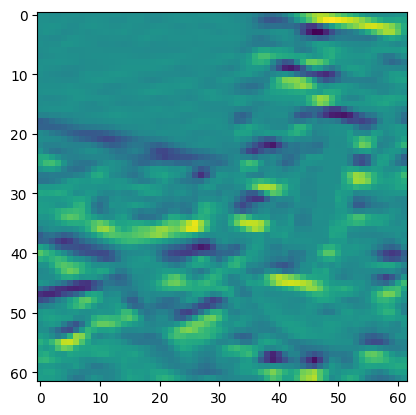

In [19]:
plt.imshow(industrialconv1, interpolation='nearest')
plt.show

Text(0.5, 1.0, 'hor_edge_filtered')

<Figure size 640x480 with 0 Axes>

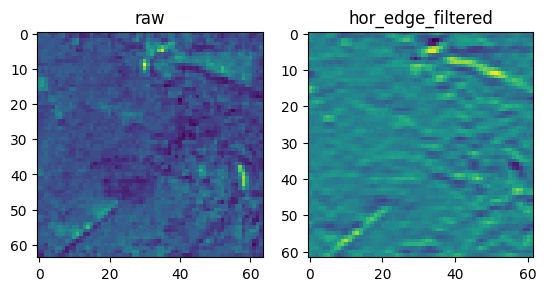

In [20]:
# g. Herhaal bovenstaande stappen maar dan voor 'Forrest_1.jpg' <-- forest with 1 r

forest = tio.read_image(path_data_forest + 'Forest_1.jpg')
forestconv2d = conv2dfilter(forest[0][:].numpy(), edge_filter.numpy(),1) #had to convert to numpy to work

plt.figure()
f, axs = plt.subplots(1,2)
axs[0].imshow(forest[0][:])
axs[0].set_title('raw')
axs[1].imshow(forestconv2d)
axs[1].set_title('hor_edge_filtered')


### Reflectie

Zijn 'Industrial_1.jpg' en 'Forrest_1.jpg' na een convolutie beter te onderscheiden?

 - A little, but with prior knowledge. 

Text(0.5, 1.0, 'stride 4')

<Figure size 640x480 with 0 Axes>

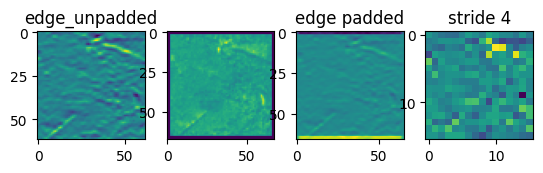

In [22]:
# Extra: varieer de stride en de padding en toon de resultaten

def zero_pad(X, pad):
  return np.pad(X, ((pad,pad),(pad,pad)), 'constant')

forest_padded = zero_pad(forest[0][:].numpy(), 2)


forestconv2d = conv2dfilter(forest[0][:].numpy(), edge_filter.numpy(),4) #had to convert to numpy to work

forest_unpadded = conv2dfilter(forest[0][:].numpy(), edge_filter.numpy(),1)
forest_padded_edge1 = conv2dfilter(forest_padded, edge_filter.numpy(),1)

plt.figure()
f, axs = plt.subplots(1,4)
axs[0].imshow(forest_unpadded)
axs[0].set_title('edge_unpadded')
axs[1].imshow(forest_padded)
axs[2].imshow(forest_padded_edge1)
axs[2].set_title('edge padded')
axs[3].imshow(forestconv2d)
axs[3].set_title('stride 4')

### Reflectie

Wat is de invloed van padding en stride op de uitkomst?
- padding: its hard to see what changed at the edges at this resolution, expect better detection at fringes
- stride: pixelated, major loss of information

### Opdracht 3: pooling uitvoeren

Met PyTorch Functional kunnen we ook een pooling filter toepassen.

In [ ]:
# a. Bekijk de pooling opties en kies de juiste avg-variant

## https://pytorch.org/docs/stable/nn.functional.html#pooling-functions
## https://pytorch.org/docs/stable/generated/torch.nn.functional.avg_pool2d.html#torch.nn.functional.avg_pool2d

# b. Pas pooling toe op de afbeelding 'Industrial_1.jpg':

    #    - Kies een 3x3 kernel en een stride van 1

Text(0.5, 1.0, 'CSI Enhanced')

<Figure size 640x480 with 0 Axes>

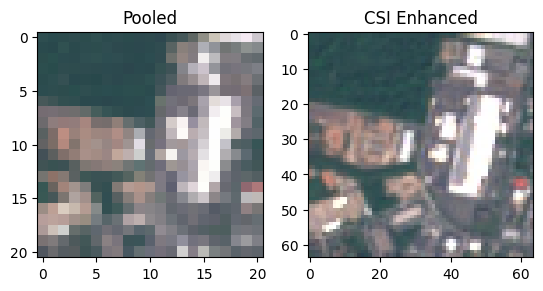

In [23]:
#avg_pool2d(input, kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None)

import torch.nn as nn

# instanciate avgpool2d with kernel of 3
pooling = nn.AvgPool2d(kernel_size=3)

industrial_pool2d = pooling(industrial.float()) #float transform because AvgPool2D does not take byte as input


# plt.imshow(industrial_pool2d.int().permute(1,2,0))
# plt.show()
plt.figure()
f, axs = plt.subplots(1,2)
axs[0].imshow(industrial_pool2d.int().permute(1,2,0))
axs[0].set_title("Pooled")
axs[1].imshow(industrial.permute(1,2,0))
axs[1].set_title("CSI Enhanced")



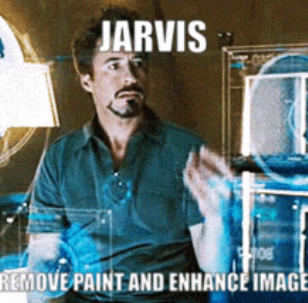

### Reflectie

Komt de visuele uitkomst overeen met je verwachtingen?
 - yes the pooling method reduces information

### Opdracht 4: convolutie en pooling combineren

Een convolutional neural net combineert afwisselend convolutie en pooling in de eerste lagen.

We kunnen nu het effect van deze combinatie onderzoeken:

- Convolutie
- Pooling

In [ ]:
# a. Bedenk en maak zelf een 2d convolution filter
    # see previous: conv2dfilter

# b. Bedenk en maak zelf een 2d pooling filter

In [24]:
def pool(X, pool_size, stride, mode='max'):
    height, width = X.shape
    f = pool_size
    H = int(1 + (height - f) / stride)
    W = int(1 + (width - f) / stride)
    A = np.zeros((H,W))

    for h in range(H):
        vert_start = h * stride
        vert_end = f + h * stride

        for w in range(W):
            horiz_start = w * stride
            horiz_end = f + w * stride
            
            a_prev_slice = X[vert_start:vert_end , horiz_start:horiz_end]
                
            if mode == "max":
                A[h, w] = np.max(a_prev_slice)
            elif mode == "average":
                A[h, w] = np.mean(a_prev_slice)
    return A

In [ ]:
# c. Pas nu de convolutie toe op 'Industrial_1.jpg'
# d. Pas vervolgens een pooling toe op de uitkomst van c.
# e. Doe hetzelfde voor de afbeelding 'Forrest_1.jpg'

Text(0.5, 1.0, 'conv1+pool')

<Figure size 640x480 with 0 Axes>

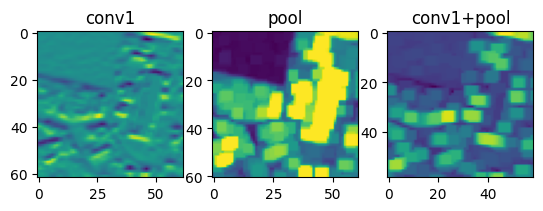

In [25]:

industrial_pooled = pool(industrial[0][:].numpy(),4,1) 
industrial_conv_pooled = pool(industrialconv1,4,1 )

plt.figure()
f, axs = plt.subplots(1,3)
axs[0].imshow(industrialconv1)
axs[0].set_title('conv1')
axs[1].imshow(industrial_pooled)
axs[1].set_title('pool')
axs[2].imshow(industrial_conv_pooled)
axs[2].set_title('conv1+pool')


### Reflectie

- Verschilt de uitkomst veel van de combinatie veel met convolutie en pooling?
    - yes outlines are better defined in conv+pool t.o.v. pool
- En zijn de afbeeldingen 'Industrial_1.jpg' en 'Forrest_1.jpg' beter te onderscheiden?
    - yes 

In [ ]:
# Extra: bereid de combinatie uit met nog een extra convolutie en pooling laag

Text(0.5, 1.0, '2x conv 2x pool')

<Figure size 640x480 with 0 Axes>

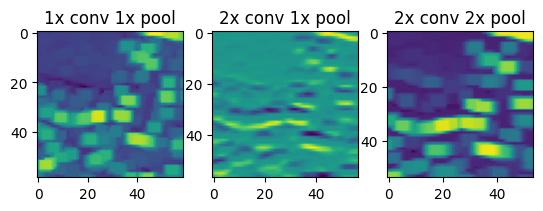

In [26]:
industrial_conv2_pooled = conv2dfilter(industrial_conv_pooled, edge_filter.numpy(),1)
industrial_conv2_pooled2 = pool(industrial_conv2_pooled ,4,1 )

plt.figure()
f, axs = plt.subplots(1,3)
axs[0].imshow(industrial_conv_pooled)
axs[0].set_title('1x conv 1x pool')
axs[1].imshow(industrial_conv2_pooled)
axs[1].set_title('2x conv 1x pool')
axs[2].imshow(industrial_conv2_pooled2)
axs[2].set_title('2x conv 2x pool')

### Reflectie

Heeft een extra laag veel invloed op de onderscheidbaarheid van de afbeeldingen?
- yes but losing information along the way due to pooling (not human readable)

### Opdracht 5: dataset prepareren

Om het neurale netwerk te trainen moeten we de dataset opsplitsen in labels (Y, de categoriën) en input afbeeldingen (X).

In [27]:
# a. Denk nog eens terug aan hoe we kruisjes van rondjes van elkaar konden onderscheiden

#    - Hoe representeerden we de labels? [0,1]
#    - Hoe representeerden we de kruisjes en de rondjes? [matrices]
#    - Hoe combineerden we dit tot een dataset?[matrices, labels]

# b. Hoe kunnen we de labels 'Industrials' en 'Forrest' dus representeren?[0=Industrial, 1 = Forrest]

# c. Vorm nu een dataset voor 'Industrials' en 'Forrest'

# d. Extra: implementeer bovenstaande via een Dataset en DataLoader class
#           (zie https://pytorch.org/docs/stable/data.html voor verdere details)

In [2]:
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, random_split

In [3]:
from torchvision.datasets import ImageFolder 
from torchvision.transforms import ToTensor
dataset_path = "./data/EuroSat/"
transform = ToTensor()
dataset = ImageFolder(dataset_path, transform=transform)

In [4]:
dataset.class_to_idx

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [12]:
forest_industrial_dataset = torch.utils.data.Subset(dataset, [1,4])

# select the indices of all other folders
idx = [i for i in range(len(dataset)) if (dataset.imgs[i][1] == dataset.class_to_idx['Industrial'] or dataset.imgs[i][1] == dataset.class_to_idx['Forest']) ]
# build the appropriate subset
subset = torch.utils.data.Subset(dataset, idx)

In [15]:
for sample_idx in range(len(subset )):
    sample = subset[sample_idx]
    
    # Access the image and label from the sample
    image, label = sample
    
    # Print or examine the sample
    if sample_idx % 1000 == 0:
        print("Sample:", sample_idx)
        print("Image shape:", image.shape)
        print("Label:", label)

Sample: 0
Image shape: torch.Size([3, 64, 64])
Label: 1
Sample: 1000
Image shape: torch.Size([3, 64, 64])
Label: 1
Sample: 2000
Image shape: torch.Size([3, 64, 64])
Label: 1
Sample: 3000
Image shape: torch.Size([3, 64, 64])
Label: 4
Sample: 4000
Image shape: torch.Size([3, 64, 64])
Label: 4
Sample: 5000
Image shape: torch.Size([3, 64, 64])
Label: 4


In [37]:
#split in train and test 
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


In [38]:
# two types of datasets in pytorch
# map-style [Dataset Class] and iterable-style [IteableDataset Class]
# DataLoader class combines both classes

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=False, num_workers=2) #numworkers parallel/subprocesses
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False) #no need to shuffle when evaluating
# its Data L oader not Data l oader

### Opdracht 6: CNN ontwerpen

We kunnen een convolutional neural net opbouwen met convolutie, pooling en fully connected lagen. Hieronder definiëren we een topologie om een afbeeldingen van  ` 64 x 64 `  te onderscheiden.

De topologie is gebaseerd op de blog post 'A simple CNN with Pytorch'. Dus zie het artikel voor extra details.

In [33]:
#-------------------------------------------------------
import torch.nn.functional as F
class CNN(nn.Module):
    
    #-------------------------------------------------------
    
    def __init__(self):
        
        # Because we inherit from Module base class
        super().__init__()
        
        # RGB input, 6 filters, kernel of 5 x 5
        self.conv1 = nn.Conv2d(3, 6, 5)  #initialise convolution but not execute
        
        # Filter is 2 x 2 with a stride of 2 (defined once, used two times)
        self.pool = nn.MaxPool2d(2, 2)
        
        # in_channels = 6 because self.conv1 output has 6 channels
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Fully connected layer matched on output of conv2 layer
        self.fc1 = nn.Linear(16 * 13 * 13, 120) # (64-5+1 = 60/2(pool) = 30-5+1 = 26/2 = 13)
        
        # Fully connected layer
        self.fc2 = nn.Linear(120, 84)
        
        # We have 10 labels
        self.fc3 = nn.Linear(84, 10)
        
    #-------------------------------------------------------
    def forward(self, x):
        
        # Convolution with relu layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # To match the output of the conv2 layer onto the first fully connected layer
        # Like reshape() but makes no copy (reuses underlaying data)

        #### RuntimeError: shape '[-1, 400]' is invalid for input of size 173056 (x.shape = torch.Size([64, 16, 13, 13]) )
        #### print('x.shape after pool-relu-conv2:', x.shape) = x.shape after pool-relu-conv2: torch.Size([64, 16, 13, 13])

        x = x.view(-1, 16 * 13 * 13)
        # Transfer from convolution to classification part:
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # No activation on final layer 
        return self.fc3(x)

#-------------------------------------------------------

### Opdracht 7: CNN trainen

Het trainen van een CNN is identiek aan het trainen van een fully connected (a.k.a. dense) netwerk.

In [ ]:
# a. Ga voor jezelf na welke stappen een typisch trainingsproces bevat

# b. Bekijk de blog post 'A simple CNN in Python' en zet de training op

# c. Het voorbeeld bevat geen validatie tijdens de trainingsstap (epoch)

#    - Bekijk het Notebook met de de postcode FastScan
#      en bereid de training uit met validatie in de trainingsloop

In [34]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [35]:
myCNN = CNN().to(device)
print('labels')

In [36]:
# Loss and optimization
import torch.optim as optim

CrossEntropyLossCriterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(myCNN.parameters(),lr=0.001,momentum=0.9)
epochs = 20

In [37]:
train_iter = iter(trainloader)
images, labels = next(train_iter)
images[1].shape

torch.Size([3, 64, 64])

In [38]:
images.shape

torch.Size([64, 3, 64, 64])

In [39]:
# Train function
epochresults = []

for epoch in range(epochs):
    
    running_loss = 0.0

    for idx, data in enumerate(trainloader):
        inputs, labels = data
        # print(inputs.shape) = torch.Size([4, 3, 32, 32])

        #---load data into GPU----
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        #-------------------------
        
        #forward pass
        outputs = myCNN.forward(inputs)
        loss = CrossEntropyLossCriterion(outputs, labels)

        optimizer.zero_grad()  # reset previous calculated loss gradients to zero
        loss.backward() # calculate new loss gradient

        optimizer.step() # update weights based on learning rate and gradients
        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    epochresults.append(epoch_loss)

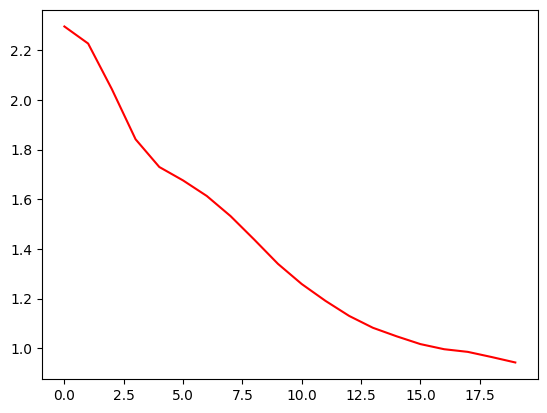

In [40]:
plt.plot(epochresults, 'red')
plt.show()

In [41]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for idx, data in enumerate(testloader):
        inputs, labels = data
        # print(inputs.shape) = torch.Size([4, 3, 32, 32])

        #---load data into GPU----
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        #-------------------------
        
        # calculate outputs by running images through the network
        outputs = myCNN.forward (inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 65 %


### Opdracht 8: dropout toevoegen

Om het netwerk effectiever te trainen wordt dropout toegepast.

PyTorch maakt het toevoegen van dropout makkelijk.

In [ ]:
# a. Bekijk het artikel Using Dropout Regularization in PyTorch Models (zie sources)

# b. Pas nu dropout toe op een hidden layer van je model

# c. Hertrain je model

#    - Let er op dat je je model evalueert in eval() mode
#    - Heeft de dropout invloed op de accuracy van je model?

In [43]:
class CNNdropout(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 13 * 13, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.drop1 = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 13 * 13)
        x = self.drop1(x)
        x = F.relu(self.fc1(x))
        x = self.drop1(x)
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [44]:
myCNNdrop = CNNdropout().to(device)

In [45]:
CrossEntropyLossCriterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(myCNNdrop.parameters(),lr=0.001,momentum=0.9)
epochs = 20

In [46]:
# Train function
epochresults = []

for epoch in range(epochs):
    
    running_loss = 0.0

    for idx, data in enumerate(trainloader):
        inputs, labels = data
        # print(inputs.shape) = torch.Size([4, 3, 32, 32])

        #---load data into GPU----
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        #-------------------------
        
        #forward pass
        outputs = myCNNdrop.forward(inputs)
        loss = CrossEntropyLossCriterion(outputs, labels)

        optimizer.zero_grad()  # reset previous calculated loss gradients to zero
        loss.backward() # calculate new loss gradient

        optimizer.step() # update weights based on learning rate and gradients
        running_loss += loss.item()

    epoch_loss = running_loss / len(testloader)
    epochresults.append(epoch_loss)

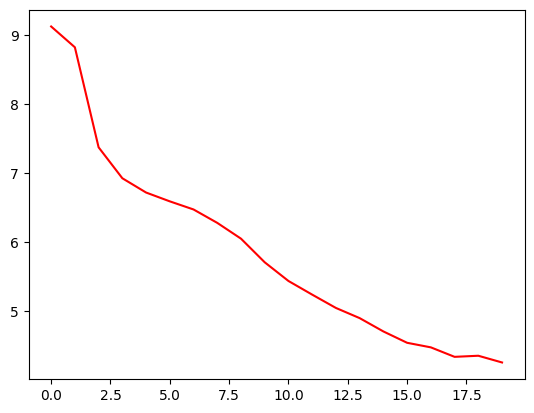

In [47]:
plt.plot(epochresults, 'red')
plt.show()

In [ ]:
print(len(train_dataset))

In [ ]:
print(len(test_dataset))

In [48]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for idx, data in enumerate(testloader):
        inputs, labels = data
        # print(inputs.shape) = torch.Size([4, 3, 32, 32])

        #---load data into GPU----
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        #-------------------------
        
        # calculate outputs by running images through the network
        outputs = myCNNdrop.forward (inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 61 %


4% worse :(

### Reflectie

- Wat gebeurt er als de dropout groot is (bijvoobeeld 0.9)?
    - Expect it to go terrible 90% de-activating 90% of the neurons in a layer = opposite of fully connected

### Opdracht 9
Apply Transfer Learning + Finetuning

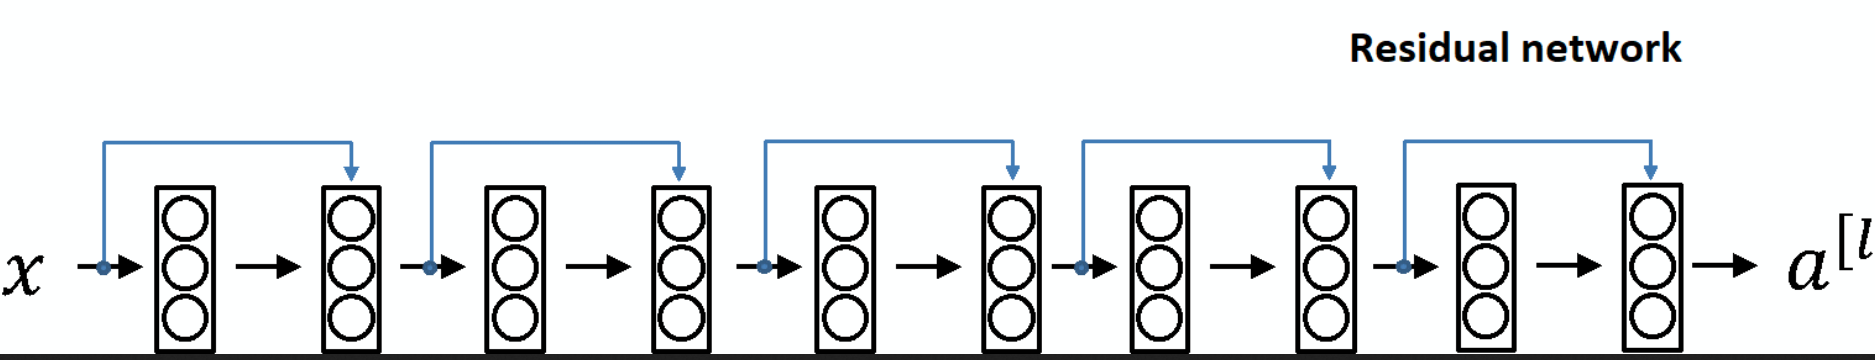

In [5]:

# RESNET18: Deep residual networks pre-trained on ImageNet
# https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py
resnetmodel = torch.hub.load("pytorch/vision", "resnet18", weights="IMAGENET1K_V1")

Using cache found in C:\Users\tinke/.cache\torch\hub\pytorch_vision_main


In [6]:
resnetmodel.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Looking at the Resnet setup we notice the usage of:
> nn.BatchNorm2d: This applies batch normalization to the output from the convolutional layer


> (downsample): Sequential(...
      )

A ResidualBlock is a block that we can re-use through out the network. The block (as shown in the architecture) contains a skip connection that is an optional parameter: downsample 

In [11]:
import inspect
# Get the source code of the forward function
source_code = inspect.getsource(resnetmodel.forward)

# Print the source code
print(source_code)

    def forward(self, x: Tensor) -> Tensor:
        return self._forward_impl(x)



In [14]:
source_code = inspect.getsource(resnetmodel._forward_impl)
print(source_code)

    def _forward_impl(self, x: Tensor) -> Tensor:
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x



Expected to see more, specifically the += part where the residual block gets added 🤔

reading the doc: https://pytorch.org/vision/main/_modules/torchvision/models/resnet.html
its defined in another class BasicBlock.forward

In [18]:
import torchvision
source_code = inspect.getsource(torchvision.models.resnet.BasicBlock.forward)
print(source_code)

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out



Here we see the residual block downsample being added += to the out 
```
  (downsample): Sequential(
       (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
```

In [51]:
num_ftrs = resnetmodel.fc.in_features
num_ftrs

512

In [52]:
# Here the size of each output sample is set to 10.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.

# (fc): Linear(in_features=512, out_features=1000, bias=True)
resnetmodel.fc = nn.Linear(num_ftrs, 10)

In [53]:
resnetmodel.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [54]:
myresnetmodel = resnetmodel.to(device)

In [55]:
#zeroshot results
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for idx, data in enumerate(testloader):
        inputs, labels = data
        # print(inputs.shape) = torch.Size([4, 3, 32, 32])

        #---load data into GPU----
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        #-------------------------
        
        # calculate outputs by running images through the network
        outputs = myresnetmodel.forward (inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 18 %


18% accuracy with no training

In [58]:
CrossEntropyLossCriterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(myresnetmodel.parameters(),lr=0.001,momentum=0.9)
epochs = 20

In [59]:
# Train function
epochresults = []

for epoch in range(epochs):
    
    running_loss = 0.0

    for idx, data in enumerate(trainloader):
        inputs, labels = data
        
        #---load data into GPU----
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        #-------------------------
        
        #forward pass
        outputs = myresnetmodel(inputs)
        loss = CrossEntropyLossCriterion(outputs, labels)

        optimizer.zero_grad()  # reset previous calculated loss gradients to zero
        loss.backward() # calculate new loss gradient

        optimizer.step() # update weights based on learning rate and gradients
        running_loss += loss.item()

    epoch_loss = running_loss / len(testloader)
    epochresults.append(epoch_loss)

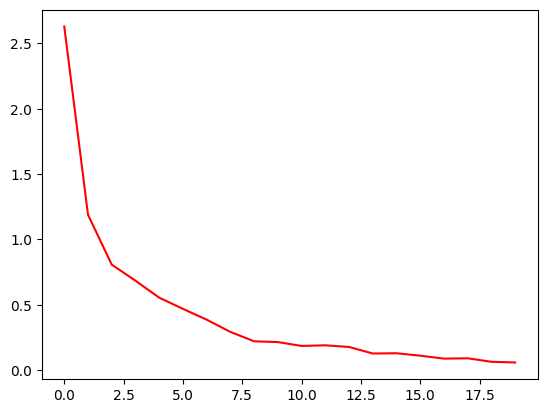

In [60]:
plt.plot(epochresults, 'red')
plt.show()

In [61]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for idx, data in enumerate(testloader):
        inputs, labels = data
        # print(inputs.shape) = torch.Size([4, 3, 32, 32])

        #---load data into GPU----
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        #-------------------------
        
        # calculate outputs by running images through the network
        outputs = myresnetmodel.forward (inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 95 %


95% accuracy on Resnet18 (10 classifications on EuroSAT) vs 65% on MyCNN